In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [15]:
df=pd.read_csv(r'datadata.txt')
df

,X,y
0,1,2
1,2,4
2,3,6
3,4,8


In [20]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
print(X)
print("***************************")
print(y)

   X 
0   1
1   2
2   3
3   4
***************************
0    2
1    4
2    6
3    8
Name:  y , dtype: int64


In [18]:
from sklearn.linear_model import Ridge


In [22]:
l = 50
ridge = Ridge(alpha = l)

ridge.fit(X, y)

Ridge(alpha=50)

In [23]:
ridge_coeff = ridge.coef_
ridge_coeff

array([0.18181818])

In [24]:
ridge_intercept = ridge.intercept_
ridge_intercept

np.float64(4.545454545454545)

In [25]:
X_test = [1,2,3,4]
y_pred = ridge.predict(pd.DataFrame(X_test))
y_pred

C:\Users\yousef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([4.72727273, 4.90909091, 5.09090909, 5.27272727])

C:\Users\yousef\AppData\Local\Temp\ipykernel_27640\3717562563.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_test[-1],y_pred[-1] , ' y = '   +    str('%.2f' %ridge_coeff)  + ' * X +'  +  str('%.2f' %ridge_intercept)


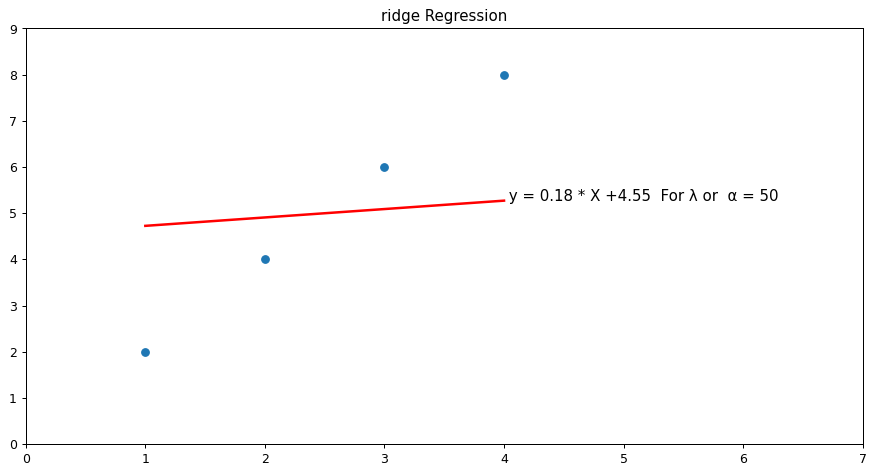

In [26]:
plt.figure(figsize=(12,6) , dpi = 90)
plt.plot(X_test,y_pred , c ='r' , linewidth = 2)
plt.scatter(X,y)
plt.ylim(ymin = 0 , ymax = 9)
plt.xlim(xmin = 0 , xmax = 7)

plt.text(X_test[-1],y_pred[-1] , ' y = '   +    str('%.2f' %ridge_coeff)  + ' * X +'  +  str('%.2f' %ridge_intercept)    
                                                   +  '  For \u03BB or  \u03b1 = ' +    str(l)  ,   fontsize = 12)
plt.title('ridge Regression')
plt.show()

Mean Squared Error mse_reg: 0.0
Intercept of the model: 2.5000000000000004
Coefficient of the line: [0.5 0.5]
Mean Squared Error: 2.0


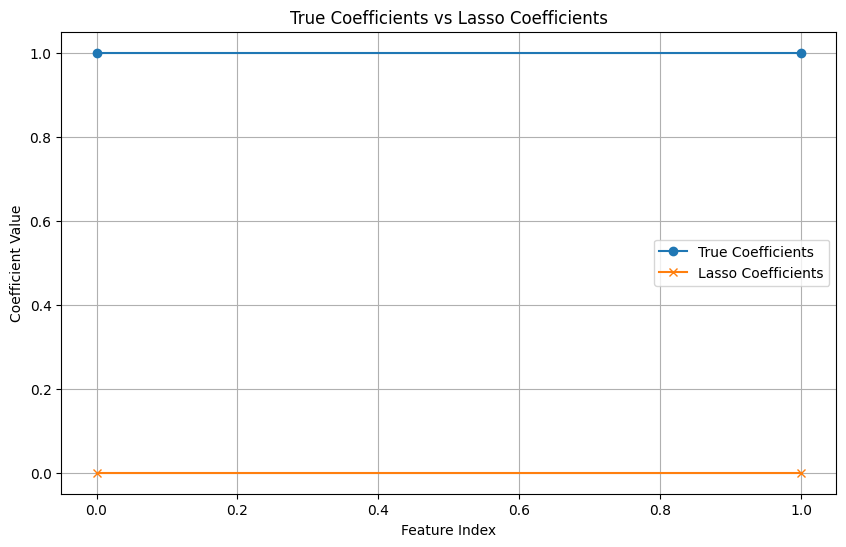

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns 
# New data points
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([4, 5, 6, 7])

# Split data into training and testing sets (here we use the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and fit the lasso regression model
reg=LinearRegression()
reg.fit(X_train, y_train)
y_pred_l=reg.predict(X_test)
mse_reg=mean_squared_error(y_test, y_pred_l)
print(f"Mean Squared Error mse_reg: {mse_reg}")


# Intecept and coeff of the line
print('Intercept of the model:',reg.intercept_)
print('Coefficient of the line:',reg.coef_)


lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true coefficients and the coefficients learned by lasso regression
true_coefs = np.array([1, 1])
plt.figure(figsize=(10, 6))
plt.plot(true_coefs, label='True Coefficients', marker='o')
plt.plot(lasso.coef_, label='Lasso Coefficients', marker='x')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('True Coefficients vs Lasso Coefficients')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error mse_reg: 0.02040816326530598
Intercept of the model: 1.3714285714285706
Coefficient of the line: [0.88571429]


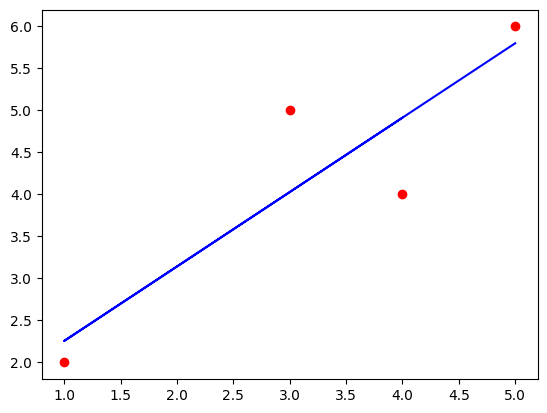

beta_0: 1.4500000000000002
beta_1: 0.85


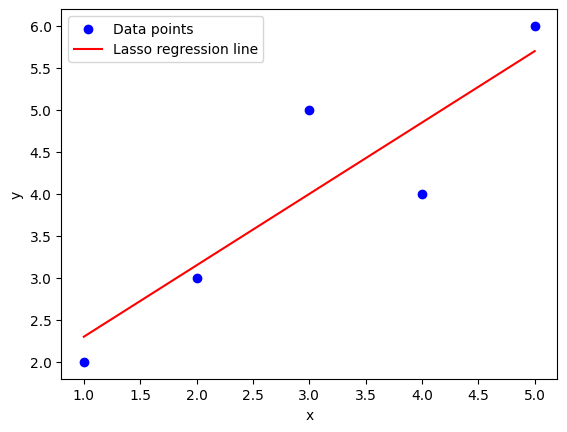

In [28]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Data points
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 4, 6])
# Create and fit the lasso regression model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

reg=LinearRegression()
reg.fit(X_train, y_train)
y_pred_l=reg.predict(X_test)
mse_reg=mean_squared_error(y_test, y_pred_l)
print(f"Mean Squared Error mse_reg: {mse_reg}")
# Intecept and coeff of the line
print('Intercept of the model:',reg.intercept_)
print('Coefficient of the line:',reg.coef_)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')

plt.show()

# Create Lasso regression model with regularization parameter alpha
lasso = Lasso(alpha=0.1)  # You can adjust alpha to see different regularization effects
lasso.fit(X, y)

# Coefficients
beta_0 = lasso.intercept_
beta_1 = lasso.coef_[0]

print(f"beta_0: {beta_0}")
print(f"beta_1: {beta_1}")

# Plotting the data points and the Lasso regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='Lasso regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
import numpy as np

# Given data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])

# Given coefficients
w = 0.85
b = 1.3

# Calculate predicted values
y_pred = w * x + b

# Calculate MSE
mse = np.mean((y - y_pred) ** 2)

print("Predicted values:", y_pred)
print("Mean Squared Error (MSE):", mse)

Predicted values: [2.15 3.   3.85 4.7  5.55]
Mean Squared Error (MSE): 0.4075000000000003
